In [12]:
import pandas as pd
import numpy as np
from numpy import median
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [2]:
sns.set(style='darkgrid')
path = '../data/'
csv_name_tips = 'tips.csv'
tips = pd.read_csv(path+csv_name_tips)
print(tips.shape)
print(tips.dtypes)
print(tips.info())
print('----------------------')
print(tips.describe(include='all'))
print('-------------isnull----------------')
print(tips.isnull().sum())

(244, 7)
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
----------------------
        total_bill      tip   sex smoker  day    time     size
count     244.0000 244.0000   244    244  244     244 244.0000
unique         NaN      NaN     2      2    4       2      NaN
top            NaN      NaN  Male     No  Sat  Dinner      NaN
freq   

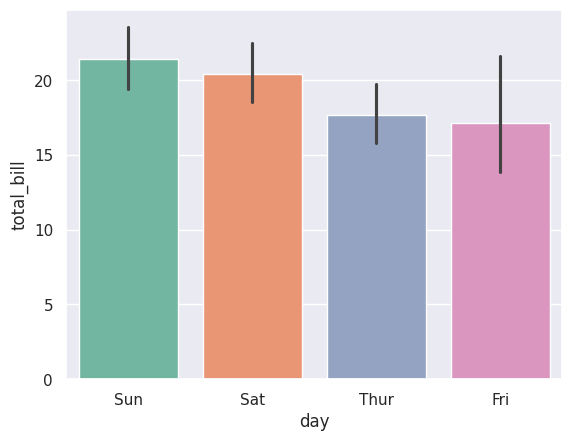

In [4]:
sns.set(style="darkgrid")
sns.barplot(x="day", y="total_bill", data=tips,palette='Set2')
plt.show()

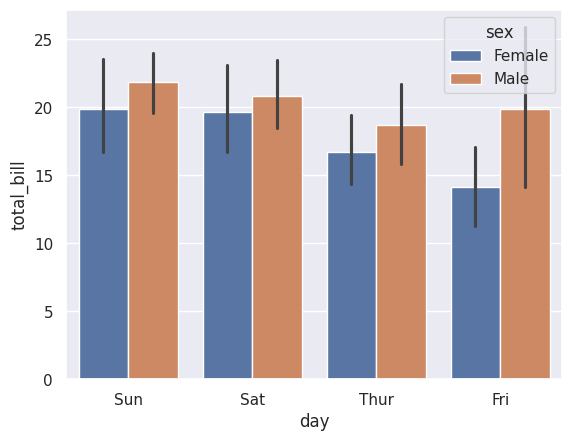

In [6]:
#2
plt.close('all')
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

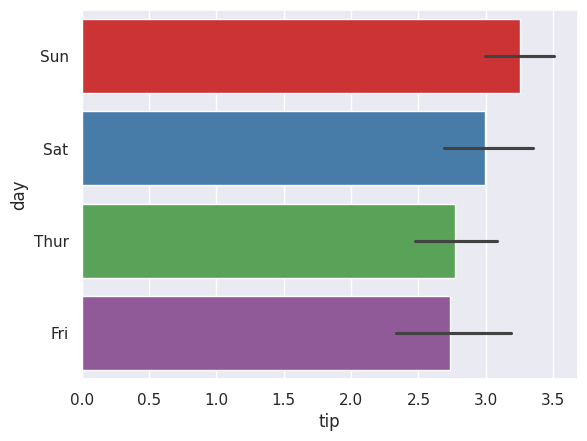

In [10]:
#3
plt.close('all')
sns.barplot(x="tip", y="day", data=tips,palette='Set1')
plt.show()

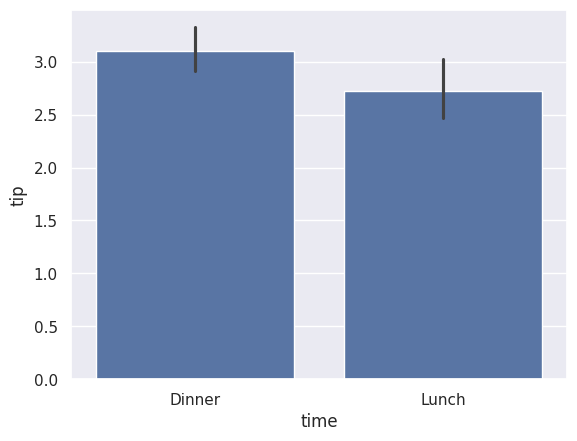

In [11]:
#4 set order
plt.close('all')
sns.barplot(x="time", y="tip", data=tips,order=["Dinner", "Lunch"])
plt.show()

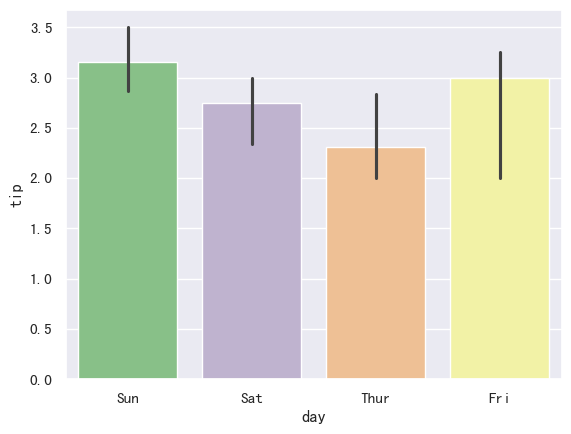

In [20]:
#5 set estimator=median
plt.close('all')
sns.barplot(x="day", y="tip", data=tips, estimator=median,palette='Accent')  #Dark2 Dark2_r Paired_r Accent Accent_r



plt.show()

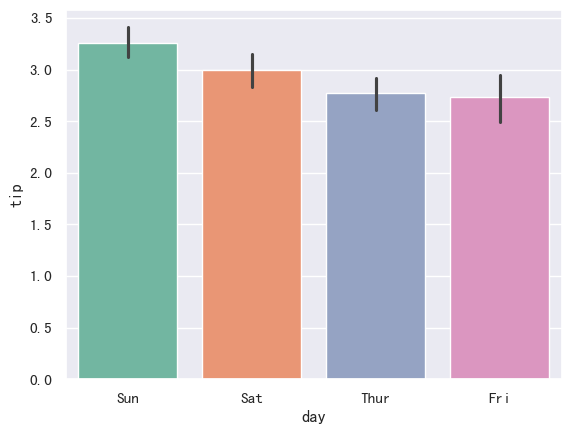

In [23]:
# 6
plt.close('all')
sns.barplot(x="day", y="tip", data=tips, ci=68,palette='Set2')
plt.show()

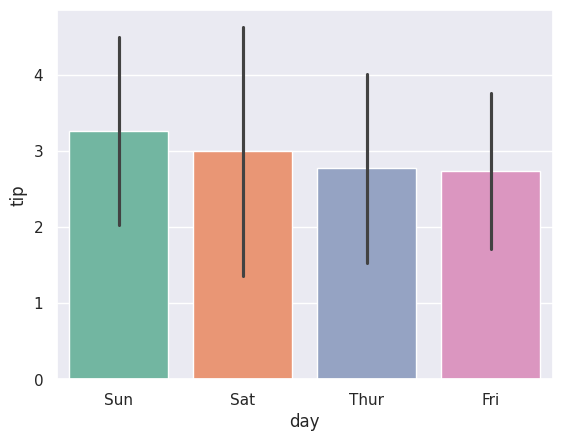

In [32]:
#7 set cii='sd'
plt.close('all')
sns.set(style="darkgrid")
sns.barplot(x="day", y="tip", data=tips, ci="sd",palette='Set2')
plt.show()

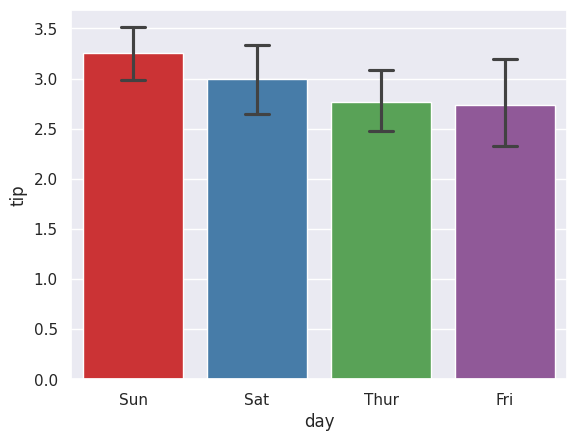

In [29]:
#8 set capsize
plt.close('all')
sns.barplot(x="day", y="tip", data=tips, capsize=.2,palette='Set1')
plt.show()

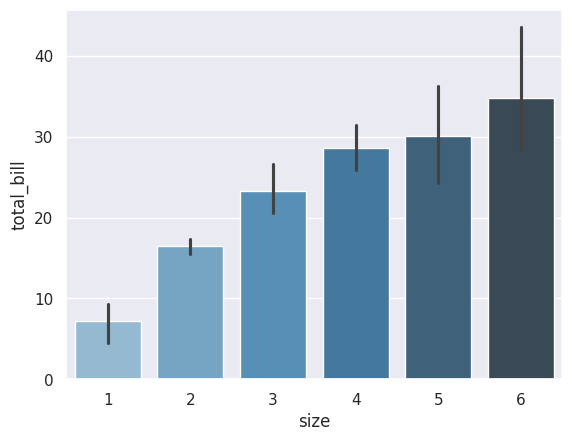

In [33]:
#9
plt.close('all')
sns.barplot(x="size", y="total_bill", data=tips,palette="Blues_d")
plt.show()

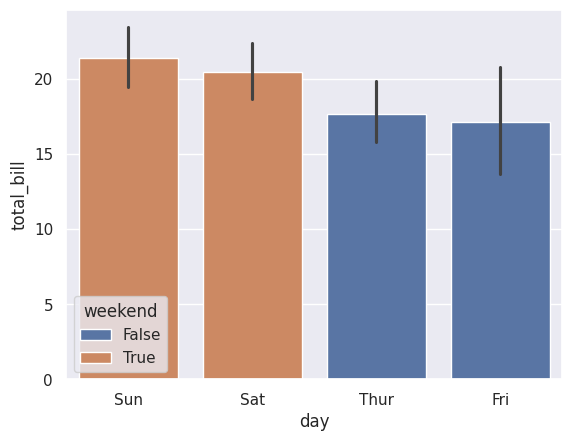

In [34]:
#10
plt.close('all')
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.barplot(x="day", y="total_bill", hue="weekend",data=tips, dodge=False)
plt.show()

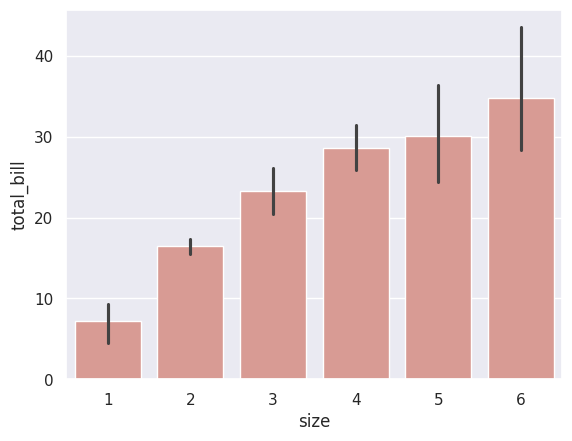

In [37]:
#11
plt.close('all')
sns.barplot(x="size", y="total_bill",data=tips,color="salmon", saturation=.5)
plt.show()

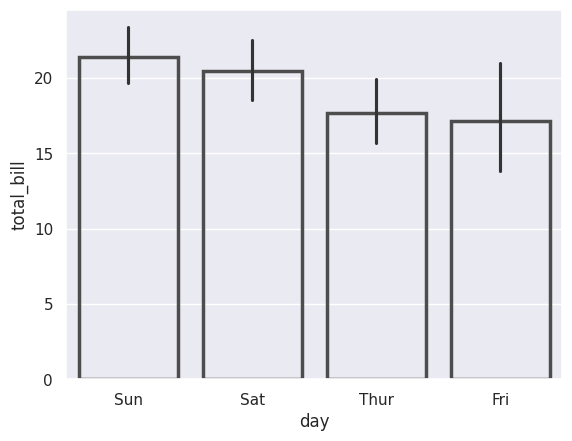

In [38]:
#12 linewidth facecolor edgecolor
plt.close('all')
sns.barplot(x="day",y="total_bill", data=tips,linewidth=2.5, facecolor=(1, 1, 1, 0),errcolor=".2",edgecolor=".3")
plt.show()

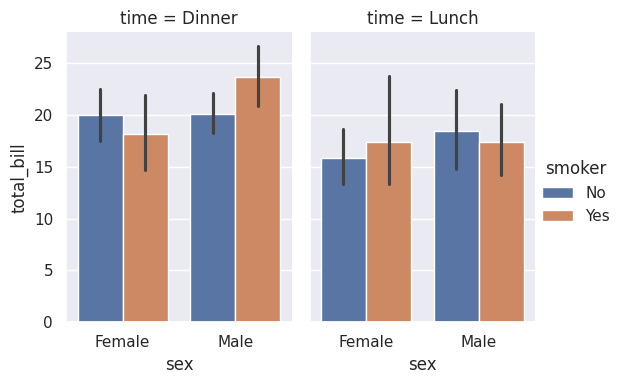

In [39]:
#13
plt.close('all')
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="bar",height=4, aspect=.7)
plt.show()

In [ ]:
'''
在默认情况下双变量关系图是散点图与直方图组合的联合直方图，可以通过设置kind来改变联合直方图。
sns.jointplot(x, y, data=None, kind='scatter', 
                  stat_func=None, color=None, height=6,
                  ratio=5, space=0.2, dropna=True, 
                  xlim=None, ylim=None, joint_kws=None,
                  marginal_kws=None, annot_kws=None, **kwargs)
kind：{"scatter"| "reg"| "resid"| "kde"| "hex"}
ratio: 
space:
dropna : bool
'''

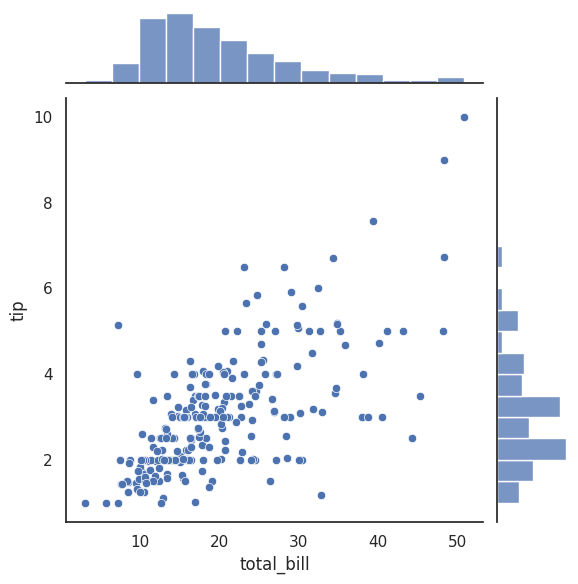

In [40]:
#1
plt.close('all')
sns.set(style="white", color_codes=True)
np.random.seed(0)
sns.jointplot(x="total_bill", y="tip", data=tips)
plt.show()

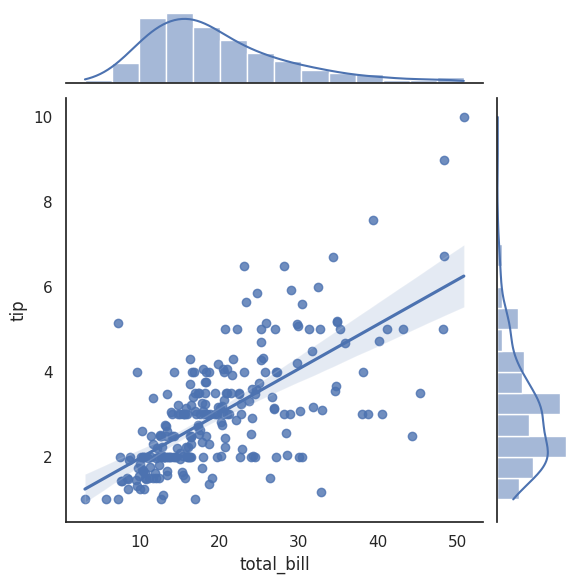

In [42]:
#2
plt.close('all')
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")
plt.show()

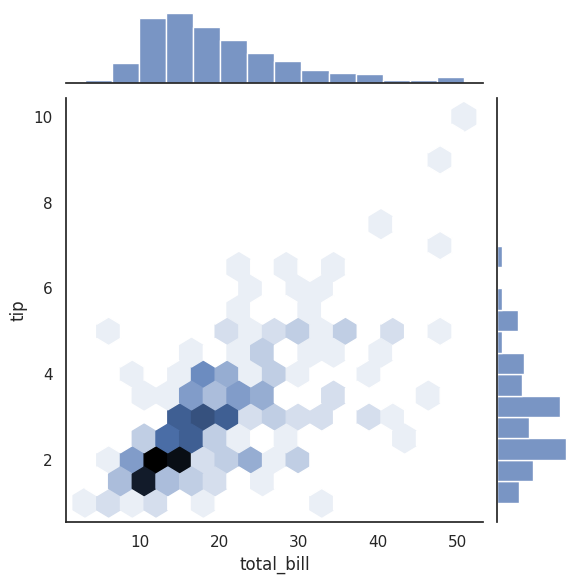

In [43]:
#3
plt.close('all')
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
plt.show()



In [53]:
iris = pd.read_csv(path+'iris.csv')

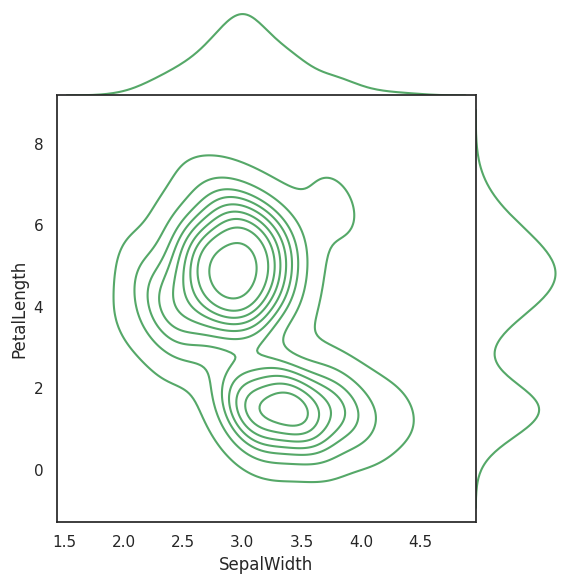

In [52]:
#4
plt.close('all')
sns.jointplot(x="SepalWidth",y="PetalLength", data=iris, kind="kde", space=0, color="g")
plt.show()

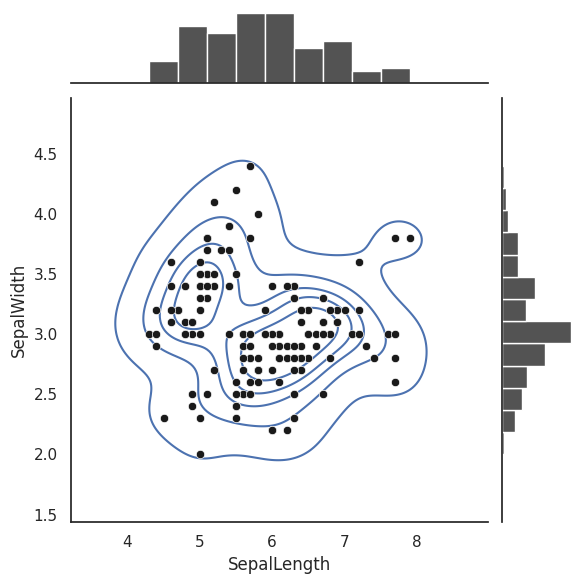

In [55]:
#5
plt.close('all')
g = (sns.jointplot(x="SepalLength",y="SepalWidth",data=iris, color="k")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.show()

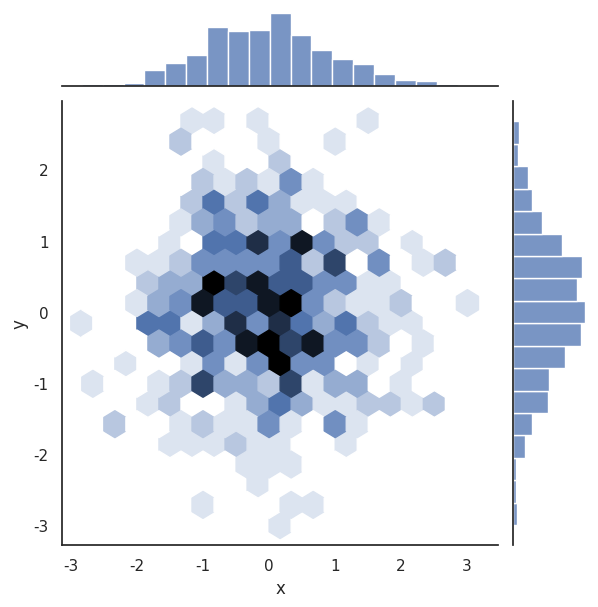

In [57]:
#
plt.close('all')
x, y = np.random.randn(2, 500)
(sns.jointplot(x=x, y=y, kind="hex").set_axis_labels("x", "y"))
plt.show()

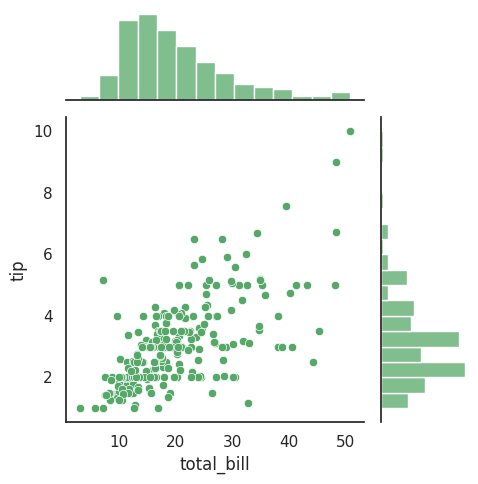

In [58]:
#7
plt.close('all')
sns.jointplot(x="total_bill", y="tip", data=tips,height=5, ratio=3, color="g")
plt.show()

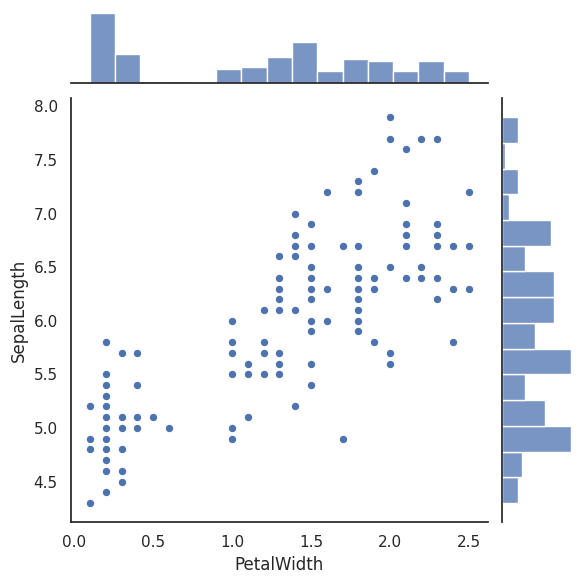

In [65]:
#8 annot_kws=dict(stat="r")
plt.close('all')
np.random.seed(0)
sns.jointplot(x="PetalWidth", y="SepalLength", data=iris,
              marginal_kws=dict(bins=15, rug=True),
              s=40,
              edgecolor="w", linewidth=1)
plt.show()